## Подготовка среды

In [2]:
# %pip install python-gdcm
# %pip install pydicom
# %pip install numpy
# %pip install matplotlib

In [3]:
import os
import shutil as sh
import zipfile as zf
import matplotlib.pyplot as plt
import numpy as np
# import pythonwin
import pydicom as dicom

In [4]:
# from google.colab import drive
# drive.mount('content')

## Чтение и распаковка данных

In [5]:
REMOTE_PATH = 'c:\\projects\\AIUniversity\\Segments'
REMOTE_DATASET_ZIP = f'{REMOTE_PATH}/Dataset.zip'
DATASET_PATH = REMOTE_PATH
DATASET_ZIP = f'{DATASET_PATH}/Dataset.zip'
# REMOTE_PATH = 'content/MyDrive/Segmentation'
# REMOTE_DATASET_ZIP = f'{REMOTE_PATH}/Dataset.zip'
# DATASET_PATH = 'dataset'
# DATASET_ZIP = f'{DATASET_PATH}/Dataset.zip'

In [6]:
# if os.path.exists(DATASET_PATH):
#   sh.rmtree(DATASET_PATH)
# os.makedirs(DATASET_PATH)

In [7]:
# sh.copy(REMOTE_DATASET_ZIP, DATASET_ZIP)

In [8]:
# with zf.ZipFile(DATASET_ZIP) as f:
#   f.extractall(DATASET_PATH)

## Просмотр изображений

In [9]:
def draw_ds(ds):
  data = ds.pixel_array
  print(data.shape)
  plt.figure(1, figsize=(16, 10))
  plt.subplot(1, 3, 1)
  plt.title('Оригинальное изображение', fontweight='bold')
  plt.imshow(data, cmap='gray')
  plt.axis('off')

  # plt.subplot(1, 3, 2)
  # plt.title('Сегментирование грудной клетки', fontweight='bold')
  # plt.imshow(rotated_image1[:, :, n], cmap='gray')
  # plt.axis('off')

  # plt.subplot(1, 3, 3)
  # plt.title('Сегментирование плеврального выпота', fontweight='bold')
  # plt.imshow(image_data2[:, :, n], cmap='gray')
  # plt.axis('off')

  plt.show()

In [43]:
def draw3D_ds(ds):
  ITEM_PER_ROW = 20
  data = ds.pixel_array
  rows, cols = data.shape[0]//ITEM_PER_ROW+1, ITEM_PER_ROW
  print(data.shape)
  print(rows, cols, rows*cols)
  fig, ax = plt.subplots(rows, cols, figsize=(10, 8))
  for i in range(rows):
    for j in range(cols):
      if rows*ITEM_PER_ROW+cols<data.shape[0]:
        AX = ax[i, j]
        AX.imshow(data[i*rows+j], cmap='gray')
        AX.axis('off')
  plt.show()

In [11]:
def get_flat_filename_list(path, extention):
  filelist = []
  items = [item for item in sorted(os.listdir(path))]
  for item in items:
    if os.path.isdir(f'{path}/{item}'):
      filelist += get_flat_filename_list(f'{path}/{item}', extention)
    else:
      if item.endswith(extention): 
        filelist.append(f'{path}/{item}')
  return filelist

In [12]:
files = get_flat_filename_list(DATASET_PATH, '.dcm')
print(len(files))
for f in files[:4]: print(f)
for f in files[-4:]: print(f)

100641
c:\projects\AIUniversity\Segments/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm
c:\projects\AIUniversity\Segments/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-002.dcm
c:\projects\AIUniversity\Segments/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-003.dcm
c:\projects\AIUniversity\Segments/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-004.dcm
c:\projects\AIUniversity\Segments/manifest-1603198545583/NSCLC-Radiomics/LUNG1-422/07-25-2010-NA-NA-06557/0.000000-NA-42364/1-115.dcm
c:\projects\AIUniversity\Segments/manifest-1603198545583/NSCLC-Radiomics/LUNG1-422/07-25-2010-NA-NA-06557/0.000000-NA-42364/1-116.dcm
c:\projects\AIUniversity\Segments/manifest-1603198545583/NSCLC-Radiomics/LUNG1-422/07-25-2010-NA-NA-06557/1.000000-NA-30827/1-1.dcm
c:\projects\AIUniversity\Segments/man

(512, 512)


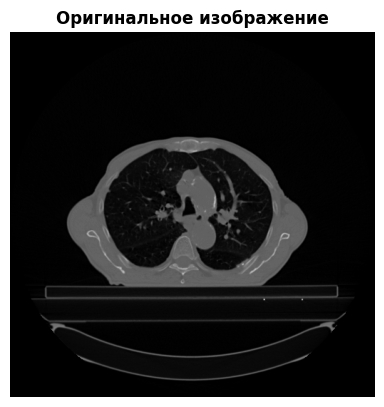

In [13]:
n = len(files)
img_path = files[np.random.randint(0, n, 1)[0]]
ds = dicom.dcmread(img_path)
draw_ds(ds)

100641
(376, 512, 512)
19 20 380


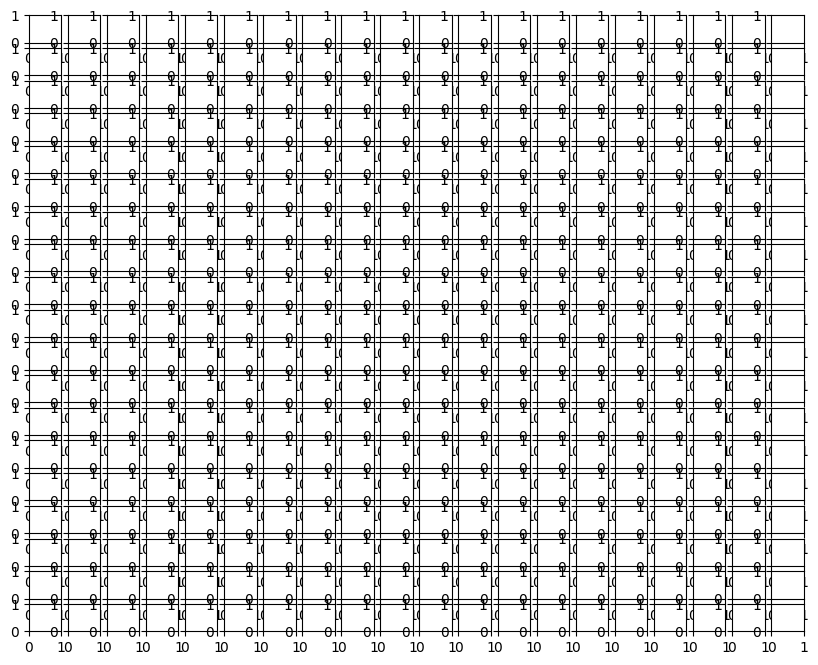

In [44]:
# Отбор 3D 
print(len(files))
img3D_path = [img for img in files if 'Segmentation' in img]
n = len(img3D_path)
ds = dicom.dcmread(img3D_path[np.random.randint(0, n, 1)[0]])
draw3D_ds(ds)